# Gaussian (Normal) Distribution

Note: The curve of a Normal Distribution is also known as the Bell Curve because of the bell-shaped curve<br>

<u>Objectives</u>: Observe **`Normal Distribution`** properties in a ~real data.

Understanding Gaussian Distribution:

- https://www.youtube.com/watch?v=rzFX5NWojp0
- https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data set
data = pd.read_csv('./data/vehicles_messy.csv', low_memory=False)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
# checking shape of data set

data.shape

(37843, 83)

## Pandas Dataframe`.describe()` method: descriptive statistics

In [4]:
# Generate descriptive statistics

data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,...,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,...,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,...,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.139300,0.000000,38.109600,0.000000,2009.000000,-750.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,138.000000,138.304000,127.000000,127.093000,5.350000,122.000000,...,197.577100,181.560900,159.100000,152.187800,2017.000000,4000.000000,7.000000,97.000000,79.000000,88.000000


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe
> Syntax: DataFrame.describe(percentiles=None, include=None, exclude=None)

**`df.describe()`** : Descriptive statistics that summarize:

* Central Tendency
* Dispersion
* Shape of a dataset's distribution 
* excluding ``NaN`` values.


## Plot a feature and check distribuition pattern

### Make plots of Series or DataFrame `df.plot()`

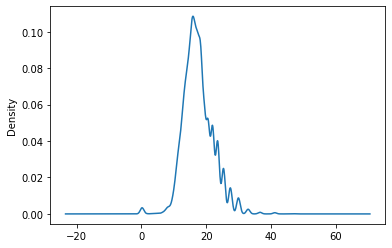

In [5]:
data['barrels08'].plot(kind='kde');

### Plotting unsing seaborn

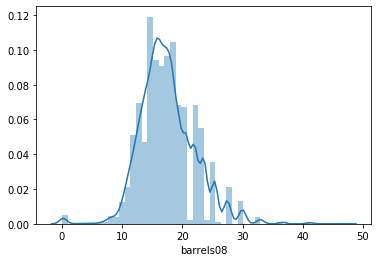

In [6]:
sns.distplot(data['barrels08']);

###  Show all plots together

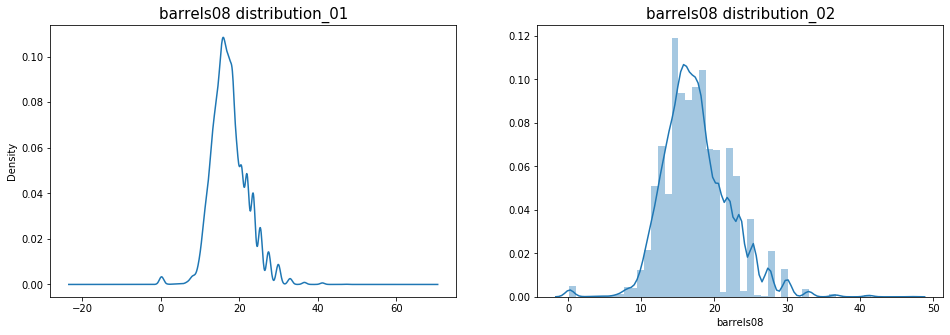

In [11]:
fig, ax = plt.subplots (1,2,figsize=(16,5))

data.barrels08.plot(kind='kde', ax=ax[0])
ax[0].set_title('barrels08 distribution_01', fontsize=15)

sns.distplot(data.barrels08, ax=ax[1])
ax[1].set_title('barrels08 distribution_02', fontsize=15)

plt.show()

### Plotting Central Tendency (MEAN, MEDIAN, MODE) of data

In [23]:
mean = data.barrels08.mean()
median = data.barrels08.median()
mode = data.barrels08.mode()[0] # Always returns Series even if only one value is returned

print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Mode: {median:.2f}')

Mean: 17.53
Median: 17.35
Mode: 17.35


#### sns.distplot()

Note: `plt.axvline()` vs. `plt.vline()`

> Syntax:
- plt.axvline(x=0, ymin=0, ymax=1, **kwargs)
- plt.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)

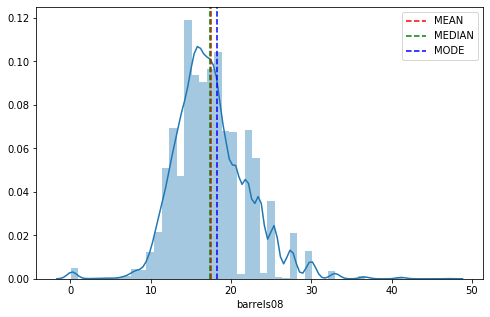

In [25]:
plt.figure(figsize=(8,5))

sns.distplot(data.barrels08)

# Add a vertical line across the axes
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')
plt.axvline(mode, color='b', linestyle='--')

plt.legend({'MEAN':mean, 'MEDIAN':median, 'MODE':mode})
plt.show()

#### sns.boxplot()

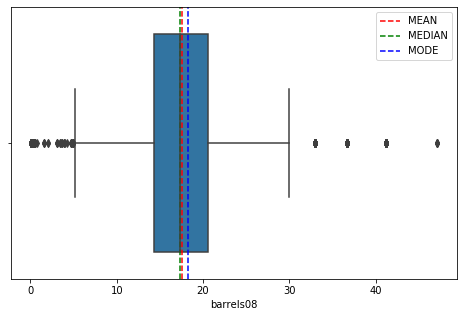

In [29]:
plt.figure(figsize=(8,5))

sns.boxplot(data['barrels08'])

# Add a vertical line across the axes
plt.axvline(mean, color='r', linestyle='--', label='MEAN')
plt.axvline(median, color='g', linestyle='--', label='MEDIAN')
plt.axvline(mode, color='b', linestyle='--', label='MODE')

plt.legend()
plt.show()

---